In [ ]:
#SET1 QUESTION1 *************************************************************************************************************************************

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("S1Q1.csv")
print(df.head())
#displays the first 5 rows of a DataFrame.

         Date  Product_ID     Category  Sales_Amount  Units_Sold
0  2024-02-01         101  Electronics        5000.0         2.0
1  2024-02-02         102      Fashion           NaN         1.0
2  2024-02-03         103    Groceries         120.0         5.0
3  2024-02-04         104  Electronics        8000.0         1.0
4  2024-02-05         105      Fashion        1500.0         NaN


In [4]:
print(df.isnull().sum())
# this will check how many missing data in each column 

Date            0
Product_ID      0
Category        0
Sales_Amount    1
Units_Sold      1
dtype: int64


In [10]:
df.fillna({'Sales_Amount': 0, 'Units_Sold': 0}, inplace=True)
# replacing the missing entries with 0
print(df.head())

         Date  Product_ID     Category  Sales_Amount  Units_Sold
0  2024-02-01         101  Electronics        5000.0         2.0
1  2024-02-02         102      Fashion        3655.0         1.0
2  2024-02-03         103    Groceries         120.0         5.0
3  2024-02-04         104  Electronics        8000.0         1.0
4  2024-02-05         105      Fashion        1500.0         0.0


In [11]:

print(df.describe())
# this shows summary statistics it doesnt take text data

       Product_ID  Sales_Amount  Units_Sold
count    5.000000      5.000000    5.000000
mean   103.000000   3655.000000    1.800000
std      1.581139   3075.235763    1.923538
min    101.000000    120.000000    0.000000
25%    102.000000   1500.000000    1.000000
50%    103.000000   3655.000000    1.000000
75%    104.000000   5000.000000    2.000000
max    105.000000   8000.000000    5.000000


In [ ]:
#SET1 QUESTION2 ************************************************************************************************************************************

In [54]:
import pandas as pd

df= pd.read_csv("S1Q2.csv")
print(df.head())


          Timestamp  User_ID        Action
0  2024-02-01 10:00     1001         Login
1  2024-02-01 10:05     1002  View Product
2  2024-02-01 10:10     1001   Add to Cart
3  2024-02-01 10:15     1003      Purchase
4  2024-02-01 10:20     1002        Logout


In [58]:
#basic operation like find the earliest action and latest action , its is based on the time in the table
first_action = df["Timestamp"].min()  
last_action = df["Timestamp"].max()   

print("First recorded action:", first_action)
print("Last recorded action:", last_action)


First recorded action: 2024-02-01 10:00:00
Last recorded action: 2024-02-01 10:20:00


In [1]:
user_action_counts = df.groupby("User_ID")("Actions").count()
print(user_action_counts)
#this counts the number of actions 

NameError: name 'df' is not defined

In [56]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Convert to datetime
df["Date"] = df["Timestamp"].dt.date  # Extract only the date

unique_users_per_day = df.groupby("Date")["User_ID"].nunique()
print(unique_users_per_day)


Date
2024-02-01    3
Name: User_ID, dtype: int64


In [57]:
most_common_action = df["Action"].value_counts().idxmax()
print("Most common action:", most_common_action)
#this print the task which has happened the most number of times


Most common action: Login


In [28]:
#SET1 QUESTION3 ************************************************************************************************************************************

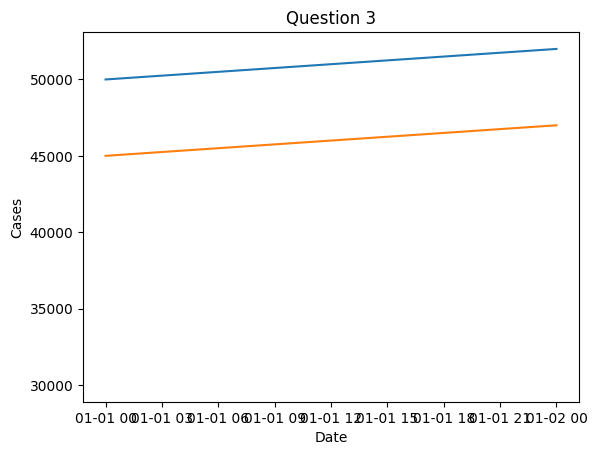

In [51]:
import matplotlib.pyplot as plt
df = pd.read_csv("S1Q3.csv")
df["Date"] = pd.to_datetime(df["Date"])
#Date initially is in string so to make it understandable for jupyter we convert into datetime format , alo help us to do sorting 

for country in df["Country"].unique():
    data = df[df["Country"] == country]
    #Yeh line "df" DataFrame se sirf uss country ka data filter kar rahi hai jo loop ke andar hai.
    plt.plot(data["Date"], data["Cases"])

plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Question 3")

plt.show()


In [41]:
total_cases = df.groupby("Country")["Cases"].sum()
print(total_cases)


Country
Brazil     30000
India      92000
USA       102000
Name: Cases, dtype: int64


In [42]:
df.groupby("Country")["Cases"].count()


Country
Brazil    1
India     2
USA       2
Name: Cases, dtype: int64

<BarContainer object of 3 artists>

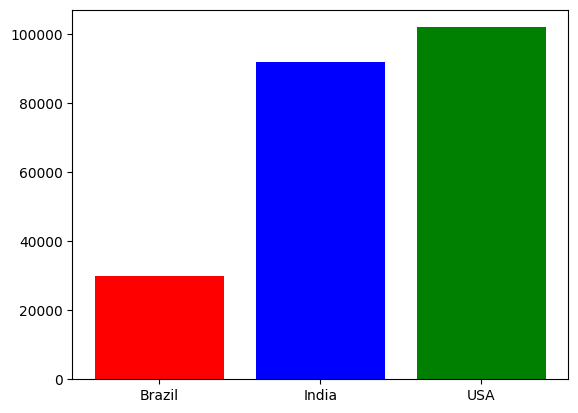

In [53]:
colors = ["red", "blue", "green"] 

plt.bar(total_cases.index, total_cases,color=colors)  
